In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
ride_city_df = pd.merge(ride_data_df,city_data_df,how ='outer', on = 'city')
# Display the data table for preview
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
#Calculations using group by :  Average Fare ($) Per City , Total Number of Rides Per City,
# Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)
ride_city_group_df = pd.DataFrame({
                    'fare' : round(ride_city_df.groupby(['type','city'])['fare'].mean(),2),
                    'Total_rides' : ride_city_df.groupby(['type','city'])['ride_id'].count(),
                    'Total_drivers' : ride_city_df.groupby(['type','city'])['driver_count'].mean()})
    
ride_city_group_df.head()


fare  Total_rides  Total_drivers
type  city                                             
Rural Bradshawfurt    40.06           10              7
      Garzaport       24.12            3              7
      Harringtonfort  33.47            6              4
      Jessicaport     36.01            6              1
      Lake Jamie      34.36            6              4

In [3]:
#Get data for Urban by filtering on index
Urban_type = ride_city_group_df.loc["Urban"]
Urban_type.head()
Ux_axis = Urban_type.Total_rides
Uy_axis = Urban_type.fare
Uz_axis = Urban_type.Total_drivers

In [4]:
#Get data for Rural by filtering on index
Rural_type = ride_city_group_df.loc["Rural"]
Rural_type.head()
Rx_axis = Rural_type.Total_rides
Ry_axis = Rural_type.fare
Rz_axis = Rural_type.Total_drivers

In [5]:
#Get data for Suburban by filtering on index
Suburban_type = ride_city_group_df.loc["Suburban"]
Suburban_type.head()
Sx_axis = Suburban_type.Total_rides
Sy_axis = Suburban_type.fare
Sz_axis = Suburban_type.Total_drivers

## Bubble Plot of Ride Sharing Data

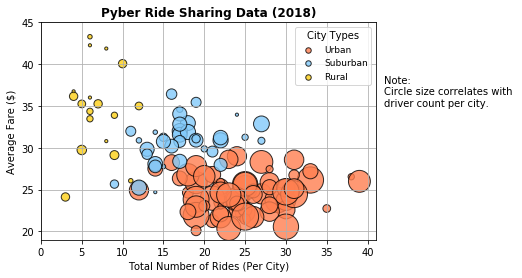

In [6]:
#Set the title,xlabel and ylabel using plt function  
plt.title("Pyber Ride Sharing Data (2018)",fontweight='bold')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(Ux_axis,Uy_axis,s=10*Uz_axis, marker="o",facecolors="#FF7F50", label = "Urban",
            edgecolors="black", alpha = 0.80)
plt.scatter(Sx_axis,Sy_axis,s=10*Sz_axis, marker="o",facecolors="#82CAFA", label = "Suburban",
            edgecolors="black", alpha = 0.80)
plt.scatter(Rx_axis,Ry_axis,s=10*Rz_axis, marker="o",facecolors="#FDD017", label = "Rural",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(0,41)
plt.ylim(19,45)
# Create a legend
lgd = plt.legend(loc="best" ,title='City Types',fontsize = 9)
lgd.legendHandles[0]._sizes = [30]
lgd.legendHandles[1]._sizes = [30]
lgd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note: \nCircle size correlates with \ndriver count per city.', fontsize=10)
# Save Figure
plt.savefig("Bubplot_citytype_Pyber.png")
plt.show()

## Total Fares by City Type

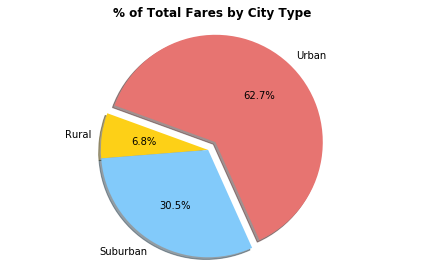

In [7]:
# Calculate Type Percents
#% of Total Fares by City Type
ride_city_df.head()
Total_fares_by_city = pd.DataFrame(
    {'total_fare' : ride_city_df.groupby(['type'])['fare'].sum()})
# Total_fare = ride_city_df['fare'].sum()
# Total_fares_perc = round(Total_fares_by_city/Total_fare*100,2)
Total_fares_by_city.head()
x_axis = Total_fares_by_city.total_fare
labels = Total_fares_by_city.index.values
#labels
# Build Pie Chart
explode = (0, 0, 0.1)
colors = ["#FDD017", "#82CAFA", "#E77471"]
plt.title("% of Total Fares by City Type",fontweight='bold')
plt.pie(x_axis,explode=explode,labels=labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle=160)
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("Total_Fares_by_City_Type_PiePyber.png")


## Total Rides by City Type

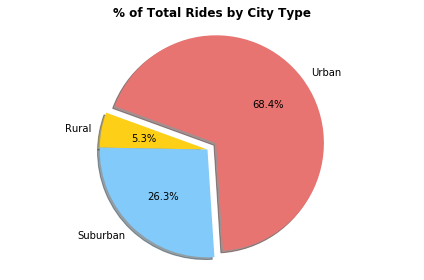

In [8]:
# Calculate Ride Percents
ride_city_df.head()
Total_rides_by_city = pd.DataFrame(
    {'total_rides' : ride_city_df.groupby(['type'])['ride_id'].count()})
Total_rides_by_city.head()
x_axis = Total_rides_by_city.total_rides
labels = Total_rides_by_city.index.values
#labels
# Build Pie Chart
explode = (0, 0, 0.1)
colors = ["#FDD017", "#82CAFA", "#E77471"]
plt.title("% of Total Rides by City Type",fontweight='bold')
plt.pie(x_axis,explode=explode,labels=labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle=160)
plt.axis("equal")
# Save Figure
plt.tight_layout()
#plt.show()

# Save Figure
plt.savefig("Total_Rides_by_City_Type_PiePyber.png")

## Total Drivers by City Type

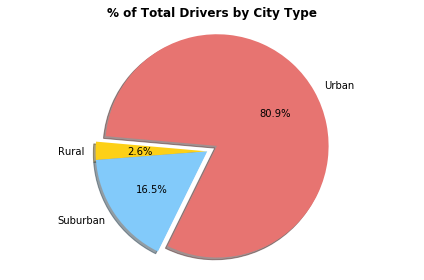

In [9]:
# Calculate Driver Percents
city_data_df.head()
Total_drivers_by_city = pd.DataFrame(
    {'total_rides' : city_data_df.groupby(['type'])['driver_count'].sum()})
Total_drivers_by_city.head()
x_axis = Total_drivers_by_city.total_rides
labels = Total_drivers_by_city.index.values
#labels
# Build Pie Chart
explode = (0, 0, 0.1)
colors = ["#FDD017", "#82CAFA", "#E77471"]
plt.title("% of Total Drivers by City Type",fontweight='bold')
plt.pie(x_axis,explode=explode,labels=labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle=175)
plt.axis("equal")
# Save Figure
plt.tight_layout()
#plt.show()
# Save Figure
plt.savefig("Total_Drivers_by_City_Type_PiePyber.png")

# # Save Figure


## Findings from the Analysis:
1. Urban city type has more Drivers and  riders compared to the other city types.
2. Though the suburban(490) has only about 20% of Urban drivers (2405),suburban makes about 49% of the Urban total fare. With further analysis Year over year, we may be able to see a trend change ,if the increase in drivers in suburban might increase the riders.
3. Urban city has more drivers than the riders whereas the ratio is reverse in the other 2 city types, which might mean a more demand for drivers.

